In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import splinelib as tsp

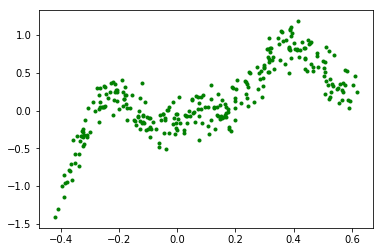

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.05, x.shape)*3
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [3]:
max_points = 20
lr=0.1
spline = tsp.Spline1D(2, x, y)
spline.n_max = max_points
# spline = tsp.Spline1D(max_points, x, y)

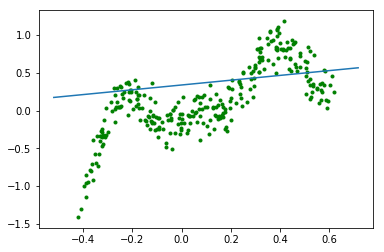

In [4]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y)

_______________________
Steps 0
Error 0.09810801434593953


_______________________
Steps 10
Error 0.09968028111894843


_______________________
Steps 20
Error 0.09833248920546865


_______________________
Steps 30
Error 0.09816970327509363


_______________________
Steps 40
Error 0.09813307078517865


_______________________
Steps 50
Error 0.09811942179535496


_______________________
Steps 60
Error 0.09811323164954952


_______________________
Steps 70
Error 0.09811030826673428


_______________________
Steps 80
Error 0.09810890701831314


_______________________
Steps 90
Error 0.0981082155048631


_______________________
Steps 100
Error 0.09810786122229063


_______________________
Steps 110
Error 0.10102829206164435


_______________________
Steps 120
Error 0.09851246846857353


_______________________
Steps 130
Error 0.09819270426621718


_______________________
Steps 140
Error 0.09811460985149575


_______________________
Steps 150
Error 0.09808301309097334


____________________



_______________________
Steps 1310
Error 0.02403840372220028


_______________________
Steps 1320
Error 0.02391062229070726


_______________________
Steps 1330
Error 0.023813423480100286


_______________________
Steps 1340
Error 0.02379258212073943


_______________________
Steps 1350
Error 0.0237717170738594


_______________________
Steps 1360
Error 0.023745052992877175


_______________________
Steps 1370
Error 0.023739219248630664


_______________________
Steps 1380
Error 0.023729238282731293


_______________________
Steps 1390
Error 0.023728729484775557


_______________________
Steps 1400
Error 0.023720788372900856


_______________________
Steps 1410
Error 0.023674083135123467


_______________________
Steps 1420
Error 0.023659576840927524


_______________________
Steps 1430
Error 0.023650286491780175


_______________________
Steps 1440
Error 0.023642969288190308


_______________________
Steps 1450
Error 0.023635570992554956


_______________________
Steps 1460
Error 0.



_______________________
Steps 2600
Error 0.023256501299448503


_______________________
Steps 2610
Error 0.0232634047790569


_______________________
Steps 2620
Error 0.0232541177467335


_______________________
Steps 2630
Error 0.023252188930778146


_______________________
Steps 2640
Error 0.02325159734814332


_______________________
Steps 2650
Error 0.02325041445777799


_______________________
Steps 2660
Error 0.023250388882693544


_______________________
Steps 2670
Error 0.023249682556730607


_______________________
Steps 2680
Error 0.023248874785653375


_______________________
Steps 2690
Error 0.023248375170316523


_______________________
Steps 2700
Error 0.02324819932324224


_______________________
Steps 2710
Error 0.023250047096664835


_______________________
Steps 2720
Error 0.023240916906093288


_______________________
Steps 2730
Error 0.02323875344255918


_______________________
Steps 2740
Error 0.023238557424905788


_______________________
Steps 2750
Error 0.023



_______________________
Steps 3900
Error 0.023271275880302842


_______________________
Steps 3910
Error 0.02340286580189008


_______________________
Steps 3920
Error 0.023299654219777022


_______________________
Steps 3930
Error 0.023279928574837627


_______________________
Steps 3940
Error 0.023271535741048142


_______________________
Steps 3950
Error 0.02326803586019109


_______________________
Steps 3960
Error 0.0232648269795097


_______________________
Steps 3970
Error 0.023262712278399083


_______________________
Steps 3980
Error 0.023260938979572637


_______________________
Steps 3990
Error 0.02325947263987999


_______________________
Steps 4000
Error 0.023258338603423905


_______________________
Steps 4010
Error 0.023250871228262835


_______________________
Steps 4020
Error 0.02324962062447329


_______________________
Steps 4030
Error 0.02324865758320767


_______________________
Steps 4040
Error 0.02324783748391773


_______________________
Steps 4050
Error 0.023

TclError: invalid command name "pyimage47"

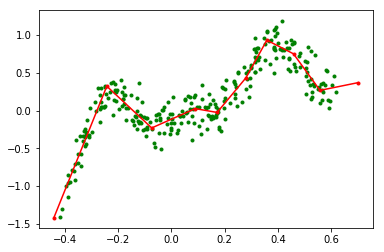

In [6]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):

#     Y = spline.forward(x) + x
    Y = spline.forward(x)
    
    dy = Y-y
    dx = spline.backward(dy)
#     dx = spline.backward(dy) + dy
    spline.update(lr)
    
    if step % 100 == 0:# and step!=0:
        spline._remove_close_points_()
        spline._combine_linear_points_()
        spline._remove_no_input_points_()
        spline._add_new_point_()
        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(spline.X, spline.Y, marker='.', color='r')
#         plt.plot(spline.X, spline.Y+spline.X, marker='.', color='r')
#         plt.scatter(x, dx, marker='.', color='c')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [6]:
# spline.n_max +=1

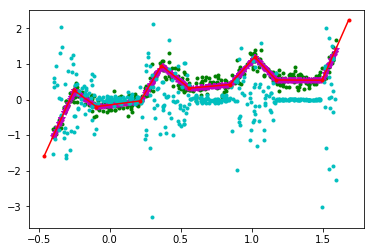

In [7]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')
# Y = spline.forward(x) + x
Y = spline.forward(x)
plt.scatter(x, Y, marker='*', color='m')
plt.scatter(x, dx, marker='.', color='c')